### Title: "MAL 04"

| Gruppe 30 |
| --------- |

| Navn                    | Studienummer |
| ----------------------- | ------------ |
| Lasse Borring Petersen  | 202208165    |
| Benjamin Harboe Strunge | 202209864    |
| Esben Inglev            | 202210050    |
| Asbjørn Vad             | 202208512    |


### Problem Statement

Pokémon have existed in many shapes and colors, both in design and form. They range from black to pink, from gigantic to tiny, from digital bits in your handheld console to your favorite plushie in your bed. Among the Pokémon population, there is also a clear distinction between the normal pokémons and the so-called "legendary" pokémons! The legendary pokémons are typically larger, stronger, rarer, and overall (subjectivly?) cooler. As humans, we can often distinguish a legendary pokémon from a normal one. But what are the characteristics that create this distinction? And more importantly (for the relevance of this course), are these characteristics we can quantify? In this O4 assignment, we will therefore see if it is possible to train an algorithm to be able to precisely and accurately predict/"figure out" whether a given Pokémon is legendary or not.

Since Pokémon are fundamentally a man-made product and not governed by any laws of nature, it is not expected that this algorithm will (or can) achieve a perfect score. Nevertheless, it is the group's hypothesis that the fundamental design rules and subconscious decisions GAME FREAK [*] follows will be enough to see patterns and achieve a satisfactory result!

[*]: The creators and designers for Pokémons


### Dataset


To begin with, the dataset is limited to only data about pokémons from the main series of Pokémon games.

All data about the pokémons and their different forms and variations is retrieved via the unofficial PokéApi [Link]. This is done via fetch_all_pokemon_data.py. The resulting JSON file takes 1-3 minutes to produce and spans an impressive 8.5 million lines. To make the data easier to work with a secondary script is made - preprocess_data.py - which creates the final data file to be worked with. It is in this preprocessing that pokémons are labeled with is_legendary, which will naturally become the dataset's resulting matrix.

This file contains 1302 pokémons. This includes all pokémons and their different variations. Based on knowledge of the games, features are selected from the raw data that may have an impact on a pokémon's legendary status.

- Id (the pokémon's id within the game)
- Name
- Height
- Weight
- The 6 stats (hp, attack, defense, special attack, special defense, speed)
- Moves_count (the number of moves a pokémon can learn. Was derived during preprocessing)
- Held_items_count (the number of different items a wild pokémon can hold. Was derived during preprocessing)
- Base_experience (the experience points the player recieves upon defeating the pokémon)
- Is_legendary (manually labeled during preprocessing)

The group hypothises that height and weight will have a significant impact, since legendaries tend to be big and strong.

[Link]: https://pokeapi.co/


This gives a feature matrix of shape (1302, 14) and a result matrix of (1302, ). The first step takes the features which are already quantified and makes a new feature name_length, which is pretty self explanitory


In [3]:
# Initial import
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import r_regression

In [4]:
POKEMON_FILE_NAME = 'preprocessed_pokemon_data.json'
with open(POKEMON_FILE_NAME, 'r', encoding='utf-8') as f:
            pokemons = json.load(f)

print(f"Loaded {len(pokemons)} pokemons from {POKEMON_FILE_NAME}")

feature_keys = ['height', 'weight', 'hp', 'attack', 'defense', 'special-attack', 'special-defense', 'speed', 'moves_count', 'held_items_count', 'base_experience']
x = [[pokemon[key] for key in feature_keys] for pokemon in pokemons]
y_is_legendary = [pokemon['is_legendary'] for pokemon in pokemons]

X = np.array(x)
y = np.array(y_is_legendary)
print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

Loaded 1302 pokemons from preprocessed_pokemon_data.json
Feature matrix shape: (1302, 11)
Target vector shape: (1302,)


Already, we can look at how the features correlates and which statistical values they poses:


In [5]:
np.set_printoptions(suppress=True, precision=2)

# Average
x_mean = X.mean(axis=0).round(1)
print("mean:\t", x_mean, "\n")

# Median
x_median = np.median(X, axis=0)
print("median:\t", x_median, "\n")

# standard deviation
x_std = X.std(axis=0).round(1)
print("std:\t", x_std, "\n")

# Pearsons R
r_regressions = r_regression(X, y).round(2)
print("Pearsons R, correlation with is_legendary:")
for feature, r in zip(feature_keys, r_regressions):
    print(f"{feature}: {r}")

mean:	 [ 20.5 980.9  71.3  81.6  75.2  73.7  73.   71.2  73.4   0.4 161.9] 

median:	 [ 10.  315.5  70.   80.   70.   65.   70.   70.   74.    0.  165. ] 

std:	 [  54.2 1971.9   26.9   31.7   30.5   32.5   27.3   30.3   27.4    0.7
   82.5] 

Pearsons R, correlation with is_legendary:
height: 0.08
weight: 0.19
hp: 0.3
attack: 0.3
defense: 0.27
special-attack: 0.36
special-defense: 0.37
speed: 0.33
moves_count: 0.08
held_items_count: -0.19
base_experience: 0.5


It seems the groups original hypothesis of height and weight was not correct. The biggest correlation with the legendary status is by far the base_experience feature. Upon further thought this fits well with the narrative, that a game developer wants it to be extra rewarding when a player overcomes an unsual challenge. The stats of the pokémon also have a relatively big positive correlation with the legendary status.

The standard deviation of weight is a lot bigger than that of everything else. 1972 compared to an otherwise average standard deviation of about 40. This will be taken into account in a future chapter (optimization and improvements)


We'll also take a look at the histograms of the features, to see if anything odd or unexpected pops up:


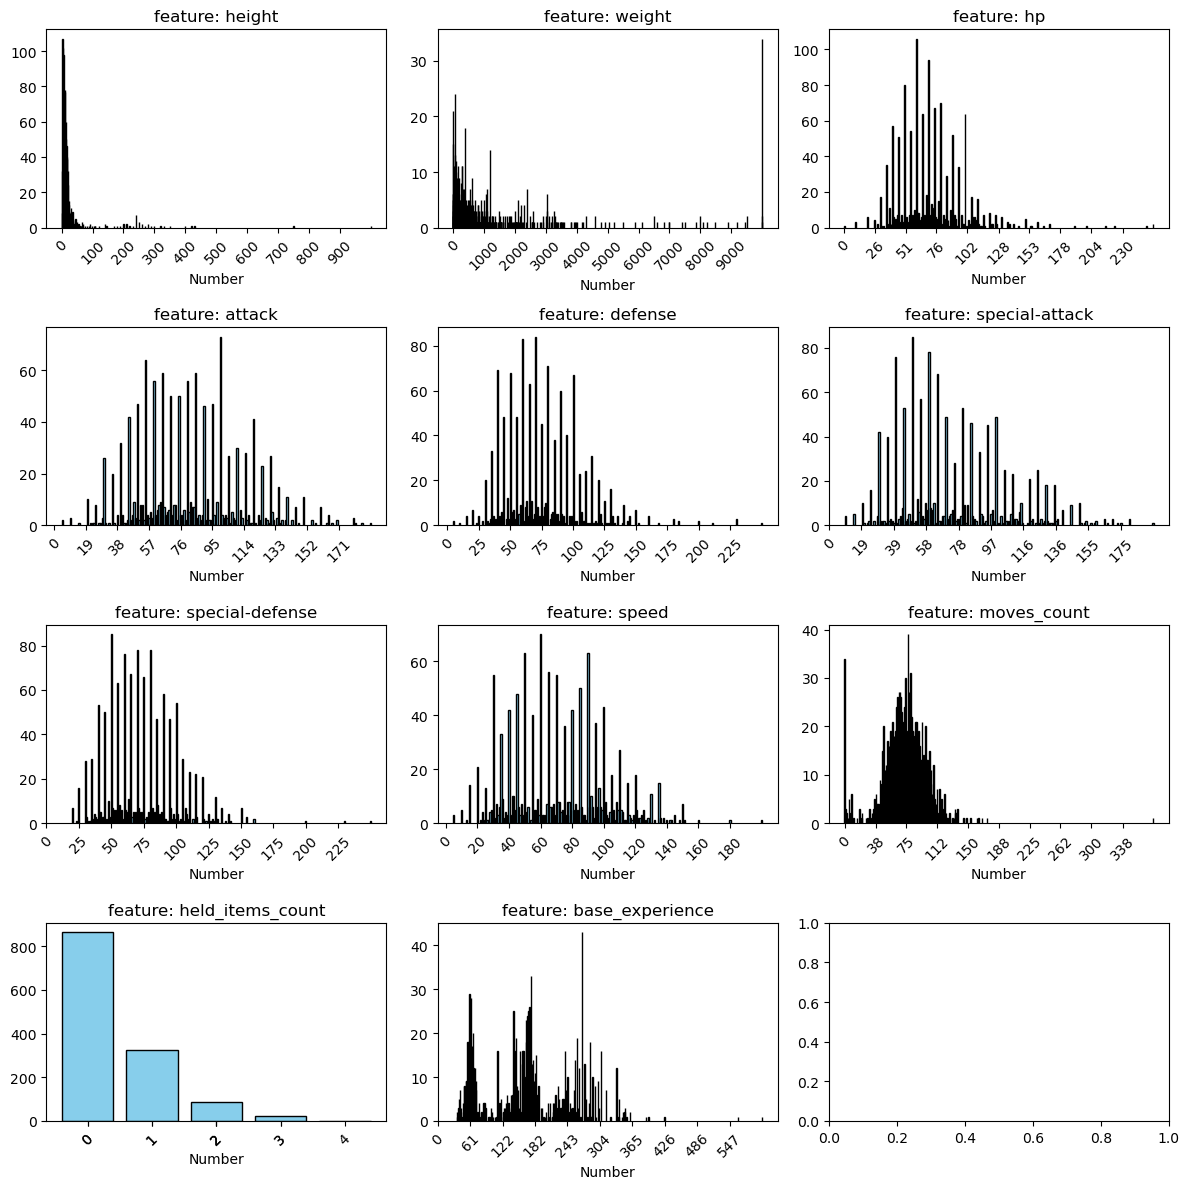

In [ ]:
## AI GENERATED ##
num_columns = X.shape[1]

fig, axes = plt.subplots(4, 3, figsize=(12, 12))

for i in range(num_columns):
    row_idx = i // 3
    col_idx = i % 3

    column = X[:, i]
    
    unique_numbers, counts = np.unique(column, return_counts=True)
    
    ax = axes[row_idx, col_idx]
    
    ax.bar(unique_numbers, counts, color='skyblue', edgecolor='black')

    ax.set_title(f'feature: {feature_keys[i]}')
    ax.set_xlabel('Number')
    ax.tick_params(axis='x', rotation=45)
    max_number = unique_numbers.max()
    ax.set_xticks(np.arange(0, max_number, max_number / 10).round(0))

plt.tight_layout()

# 5. Display the plot
plt.show()
## AI GENERATED ENDS ##

A lot of the graphs, when visually inspected, shows a lot of nice looking bellcurves - some more skewed than others. This confirms the groups suspecion, that the designers at GAME FREAKS like all other humans creates guassian distributed results. I does not prove any correlation between the features and the legendary status, but its good to know that choosen values aren't just noise values.

There are a few things to address tough. First of all, the keen reader will quickly notice that the histograms of the graphs are overall bellcurved but with spikes at certain values. This is explained by the tendency to make values a multiplier of 5 or 10, which makes the numbers look nice.
The secondary odd thing is the amount of REALLY heavy pokémons. Actually the biggest occurency of the weight feature is the max weight of 10000 kg. These values comes from the 32 gigantamax pokemon! This is a variant of normal pokemons, which has been boosted by supernatural powers to an enormous size. The third and last odd thing we'll touch upon, is the seeming lack of a gaussian curve in the base_experience feature. It seems like there is 3 distinct groups in the base_experience feature. Why these occur is an exercise left to the reader :)


The final thing we'll look at is the distribution of legendary and non-legendary pokémon:


In [7]:
print("Amount of legendary pokemon:", y.sum())
print("Amount of non-legendary pokemon:", len(y) - y.sum())
print("Percentage of legendary pokemon: {:.2f}%".format((y.sum() / len(y)) * 100))

Amount of legendary pokemon: 131
Amount of non-legendary pokemon: 1171
Percentage of legendary pokemon: 10.06%


The percentage of legendary pokémon is only 10%! This is a big overrepresentation of non-legendary pokémon which must be taken into consideration!


### Choosing a model


To classify if a pokémon is legendary, we need a classifier. SciKit-learn provides a multitude of different classifiers. For the initial test, a Random Forest Classifier (RFC) will be used. The RFC is a supervised classifier model, which uses the power of "majority votes" to predict its result. The predictions of RFC works by supplying multiple small training algorithms (so called trees) with only a subset of the dataset and features. Since these "sub-algorithms" all have a different training dataset and amount of features, they obviously will differ in coefficients and thereby results. When a prediction is requested all the sub-algorithms make their conclusion, this is then aggregated into a final result.

Because of this "averaging" of the result and dividing of the values, the model is a lot less prone to overfitting. Lets try running the randomForestClassifer and see the scores of a non-optimized model and dataset.


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

classifier_init = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, random_state=42)


The RFC can be provided with different parameters. In the above the RFC is provided with the following parameters:

- max_depth = 5: The size of and complexity of each tree
- n_estimators = 10: amount of trees
- max_features = 1: How many features one tree is allowed to train on
- random_state = 42: To ensure the classifer uses the same random values to train. With a constant random_state the model will always fit the same coefficients each time. Granted no other variables are changed.


### Perfomance metrics


To test the classifier we split the original feature matrix and label matrix into a training and test set. 20% of the original set i set aside for testing. To determine how well the classifier perfoms we calculate different metrics using scikits metric functions. Before diving into the result, we'll quickly explain the meaning of our choosen metrics.

Precision: Of all the times a model predicted "positive" (aka. "yes, its a legendary"), how often were those predictions correct? A high precision measures the quality of the prediction and how trustworthy a positive prediction is.

Recall: Of all the actual "Positive" samples, what fraction did the model successfully identify? Recall measures the model's ability to find all the positive samples. A high recall means the model is good at hitting positive cases.

Accuracy: Overall, what fraction of predictions did the model get right?

F1-score: What is the balanced score between precision and recall?

The F1-score will be used as the "final" score to determine how good the model is. One could think using accuracy would be enough to determine a models perfomance. It is after all the metric which is a percentage of how often the model predicts correctly. BUT, especially in our case with a heavily skewed distrubtion (remember the 1 in 10 distribution of non-legendaries vs legendarys), a model that just guesses "non-legendary" everytime would get an accuracy of a whopping 90%! This would not be a good model, since it is unable to find any legendaries. Therefore the F1-score is good to get an overall number, which is simple and easy to compare with other trainings.


In [9]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_init = X[:int(0.8 * len(X))]
X_test = X[int(0.8 * len(X)):]
y_train_init = y[:int(0.8 * len(y))]
y_test = y[int(0.8 * len(y)):]

classifier_init.fit(X_train_init, y_train_init)
y_pred = classifier_init.predict(X_test)

# scores
accuracy_init = accuracy_score(y_test, y_pred)
precision_init = precision_score(y_test, y_pred)
recall_init = recall_score(y_test, y_pred)
f1_init = f1_score(y_test, y_pred)
print(f"Initial model scores:\nAccuracy: {accuracy_init:.4f}\nPrecision: {precision_init:.4f}\nRecall: {recall_init:.4f}\nF1-score: {f1_init:.4f}")

Initial model scores:
Accuracy: 0.9080
Precision: 0.7436
Recall: 0.6744
F1-score: 0.7073


Generally speaking a F1-score of 0.5 and lower is considered bad. A score of above 0.7 is average and 0.9 is good [*]. Our initial traning sits at a F1-score of 0.71 which is alright if you take into account that nothing has been optimized yet.

[*]: Atleast according to this blog https://encord.com/blog/f1-score-in-machine-learning/


### Optimizations and improvements


Our first course of action in optiming the data is to not do a manual split of training and test splits. By making a hard split, the data could be accidentially be split unevenly. Maybe all of the legendaries are at the end of our dataset. This would prevent the model ever form learning what a legendary pokémon is! Therefore we'll quickly switch to using scikits StratifiedKFold function.

- From our experience with playing the pokémon games, and looking at the official pokédex, we know that the legendary pokemon are almost always located at the end of a generation range. Eg. generation 1 has 151 pokemon, where in the range 144-151, all 7 legendaries of the generation are located in the pokèdex.

K-fold is a strategy that splits the data into n amount of sub-sets. And straification is a method which ensures the subsets created by k-fold is propotional distributed to the original dataset. This is especially important to imbalanced datasets like ours. The model then runs n times, where a new subset is choosen to be the training set each time. The average results of these trainings becomes the final result:


In [10]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv_strategy = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(classifier_init, X, y, cv=cv_strategy, scoring='f1')
print("Model trained successfully.")

print(f"\n\nF1 scores for each of the 10 folds: {np.round(scores, 2)}")
print(f"Average F1 Score: {scores.mean():.2f}")
print(f"Standard Deviation of F1 Scores: {scores.std():.2f}")

Model trained successfully.


F1 scores for each of the 10 folds: [0.7  0.42 0.35 0.64 0.7  0.53 0.56 0.53 0.63 0.6 ]
Average F1 Score: 0.57
Standard Deviation of F1 Scores: 0.11


This actually lowered our F1-score! It seems like we were extremely lucky to find an above average split of our training set, when we did it manually. It could be tempting to ignore the new results and present the old, better results. But sadly our new score of 0.57 is a much more realistic score, as it's the average of multiple data splits and trainings. From here on own, will try to imporve our now realistic and more trustworthy F1 score.

First we'll try to add the parameter "class_weight = 'balanced'" to our classifier. This is a parameter which helps a big problem with the data set: The overrepresentation of non-legendary pokemon. To componsate for the low fraction of legendary pokemon, it punishes the model more heavily for false negatives (missclassifying legendary pokemons). This generally gives a better result for imbalanced datasets:


In [11]:
classifier_balanced = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, class_weight='balanced', random_state=42)

scores_balanced = cross_val_score(classifier_balanced, X, y, cv=cv_strategy, scoring='f1')

print(f"\n\nF1 scores for each of the 10 folds: {np.round(scores_balanced, 2)}")
print(f"Average F1 Score: {scores_balanced.mean():.2f}")
print(f"Standard Deviation of F1 Scores: {scores_balanced.std():.2f}")



F1 scores for each of the 10 folds: [0.79 0.56 0.84 0.74 0.83 0.62 0.69 0.71 0.56 0.65]
Average F1 Score: 0.70
Standard Deviation of F1 Scores: 0.10


Yes! This did a massive improvement from 0.57 to 0.70! Now lets try tweaking som parametervalues for the classifier. Instead of manually testing multiple values by hand, we'll use GridSearchCV and RandomizedSearchCV. GridSearchCV tests all possible combinations of the specific values. This gives us a full overview of all combinations, which obviously is good and sounds like the way forward. But, if we have 5 different parameters we want to test with 5 different values the GridSearchCV would need to train 3125 models each with their own 10 folds! This is a lot, and this is where RandomizedSearchCV comes into play. It picks parameters and values and tries a set amount of combinations. Usually, with a reasonable amount of combinations, it can give nearly as good results as GridSearchCV with much higher training speed. Since it also has a set amount of combinations to try, we can also safely add more values at a wider range. A proccess could be to use RandomSearch to quickly try a wide range of parameter values and then use GridSearch to hone in


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# assert False, "Remove if you want to run the random search. It takes a while!"

classifier_random_search = RandomForestClassifier(class_weight='balanced', random_state=42)

param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [5, 10, 20, 50, None],
    'max_features': [1, 'sqrt', 'log2'],
    'min_samples_leaf': [1, 2, 4, 6, 8]
}

random_search = RandomizedSearchCV(
    estimator=classifier_random_search,
    param_distributions=param_grid,
    n_iter=100,
    cv=cv_strategy,
    scoring='f1',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search.fit(X, y)

print(f"Best parameters found: {random_search.best_params_}")
print(f"Best cross-validated F1 score: {random_search.best_score_:.4f}")

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, n_estimators=200; total time=   0.6s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, n_estimators=200; total time=   0.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=6, n_estimators=10; total time=   0.1s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, n_estimators=200; total time=   0.7s

The RandomSearch found a better combination of parameters and upped the F1-Score to 0.74! Now with the knowledge of what parameter value seems to work best, lets try to hone in on a even better values with the GridSearch. Its important to note that a higher n_estimator (trees) usually give a better result, but this values also has an approximately linear relationship with training time and shows diminishing returns. Therefore it is important to find a sweetspoot. For the sake of this assignment the n_estimator max is set to 200.


In [13]:
from sklearn.model_selection import GridSearchCV

# assert False, "Remove if you want to run the grid search. It takes a while!"

classifier_grid_search = RandomForestClassifier(class_weight='balanced', random_state=42)

param_grid = {
    'n_estimators': [200],
    'max_depth': [15, 20, 25, 30, None],
    'max_features': [1, 'sqrt', 'log2'],
    'min_samples_leaf': [1, 2, 3, 4]
}

grid_search = GridSearchCV(
    estimator=classifier_grid_search,
    param_grid=param_grid,
    cv=cv_strategy,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X, y)

classifier_optimized = grid_search.best_estimator_

print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validated F1 score: {grid_search.best_score_:.4f}")

Fitting 10 folds for each of 60 candidates, totalling 600 fits
[CV] END max_depth=15, max_features=1, min_samples_leaf=1, n_estimators=200; total time=   0.5s
[CV] END max_depth=15, max_features=1, min_samples_leaf=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=15, max_features=1, min_samples_leaf=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=15, max_features=1, min_samples_leaf=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=15, max_features=1, min_samples_leaf=1, n_estimators=200; total time=   0.6s
[CV] END max_depth=15, max_features=1, min_samples_leaf=1, n_estimators=200; total time=   0.6s
[CV] END max_depth=15, max_features=1, min_samples_leaf=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=15, max_features=1, min_samples_leaf=1, n_estimators=200; total time=   0.6s
[CV] END max_depth=15, max_features=1, min_samples_leaf=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=15, max_features=1, min_samples_leaf=1, n_estimators=2

After running the 450 different combinations with sharpened values, the gridsearch found a better combination of parameters. This resultet in a 0.01 improvement to 0.75. We could go into a deep rabbit hole optimization of the parameters, but lets say thats fine for now.

Now that we got our model with good (not perfect) optimized parameters. Lets look into what we can do with improving the the data set itself. In the [Dataset](#dataset) chapter we noticed how there were a lot of very heavy pokemons, the so-called gigantamax pokemon. These are a rare (rarer than legendary) pokemons. There also exists "mega" pokemons (also rare) which has boosted stats. Since these pokemons are just 'boosted' versions of existing pokemons, and therefore can be considered duplicates, lets try removing them and see how it affects our score.


In [14]:
filtered_pokemons = [
    pokemon for pokemon in pokemons 
    if "gmax" not in pokemon["name"] and "mega" not in pokemon["name"]
]

x_filtered = [[p[key] for key in feature_keys] for p in filtered_pokemons]
y_filtered_is_legendary = [p['is_legendary'] for p in filtered_pokemons]

X_filtered = np.array(x_filtered)
y_filtered = np.array(y_filtered_is_legendary)

print(f"Number of pokemons removed: {len(pokemons) - len(filtered_pokemons)}")
print(f"New feature matrix shape: {X_filtered.shape}")
print(f"New target vector shape: {y_filtered.shape}")

Number of pokemons removed: 84
New feature matrix shape: (1218, 11)
New target vector shape: (1218,)


In [15]:
from sklearn.model_selection import train_test_split

scores_filter = cross_val_score(
    classifier_optimized,
    X_filtered,
    y_filtered,
    cv=cv_strategy,
    scoring='f1',
    n_jobs=-1
)

print(f"\n\nF1 scores for each of the 10 folds: {np.round(scores_filter, 2)}")
print(f"Average F1 Score: {scores_filter.mean():.2f}")
print(f"Standard Deviation of F1 Scores: {scores_filter.std():.2f}")



F1 scores for each of the 10 folds: [0.89 0.76 0.72 0.72 0.78 0.81 0.6  0.76 0.8  0.62]
Average F1 Score: 0.75
Standard Deviation of F1 Scores: 0.08


That actually did not improve the score of our model as expected. Apparently these "outliers" with abnormal stats does not affect the perfomance. Instead of removing data values, lets try to extrapolate some new features from out already existing data. We'll add:

- Name length
- Height-weight ratio
- Stat total

And look at the pearsons R values again


In [16]:
extended_keys = feature_keys + ['name_length', 'height_weight_ratio', 'stat_total']

x_extended = [
    [pokemon[key] for key in feature_keys] + 
    [
        len(pokemon["name"]),
        0 if pokemon["weight"] == 0 else pokemon["height"] / pokemon["weight"],
        pokemon["hp"] + pokemon["attack"] + pokemon["defense"] + pokemon["special-attack"] + pokemon["special-defense"] + pokemon["speed"]
    ]
    for pokemon in pokemons
]

X_extended = np.array(x_extended)
print(f"Extended feature matrix shape: {X_extended.shape}")

r_regressions_extended = r_regression(X_extended, y).round(2)
print("\nPearsons R, correlation with is_legendary:")
for feature, r in zip(extended_keys, r_regressions_extended):
    print(f"{feature}: {r}")


scores_extended = cross_val_score(
    classifier_optimized,
    X_extended,
    y,
    cv=cv_strategy,
    scoring='f1',
    n_jobs=-1
)

print(f"\n\nF1 scores for each of the 10 folds: {np.round(scores_extended, 2)}")
print(f"Average F1 Score: {scores_extended.mean():.2f}")
print(f"Standard Deviation of F1 Scores: {scores_extended.std():.2f}")


Extended feature matrix shape: (1302, 14)

Pearsons R, correlation with is_legendary:
height: 0.08
weight: 0.19
hp: 0.3
attack: 0.3
defense: 0.27
special-attack: 0.36
special-defense: 0.37
speed: 0.33
moves_count: 0.08
held_items_count: -0.19
base_experience: 0.5
name_length: 0.11
height_weight_ratio: -0.02
stat_total: 0.48


F1 scores for each of the 10 folds: [0.8  0.65 0.89 0.92 0.87 0.72 0.79 0.74 0.64 0.85]
Average F1 Score: 0.78
Standard Deviation of F1 Scores: 0.09


A small improvement of 0.03 to the F1-Score. Looking at the pearsons R values, it seems like only stat_total has an effect on the is_legendary status, which is what could be contributing to the improved score.

Now lets try to also address the problem of weight feature. As seen in the dataset chapter the weight has a max of 10.000, which is a lot bigger than all of the other values. A big number can result in the model overprioritizing the value. Therefore we'll add our model to a pipeline, where we use SciKits StandardScaler to scale to values down to a more appropiate ranges


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, StratifiedKFold

pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', classifier_optimized)
])

print("Running cross-validation with a scaling pipeline...")
scores_scaled = cross_val_score(
    pipeline,
    X_extended,
    y,
    cv=cv_strategy,
    scoring='f1',
    n_jobs=-1
)

print(f"\n\nF1 scores for each of the 10 folds: {np.round(scores_scaled, 2)}")
print(f"Average F1 Score: {scores_scaled.mean():.2f}")
print(f"Standard Deviation of F1 Scores: {scores_scaled.std():.2f}")

Running cross-validation with a scaling pipeline...


F1 scores for each of the 10 folds: [0.8  0.67 0.89 0.92 0.87 0.72 0.79 0.74 0.64 0.81]
Average F1 Score: 0.78
Standard Deviation of F1 Scores: 0.09


The scaling did not have any noticable effect on the score. It seems like we're hitting a dead end in optimizing the data and parameters of the model. Even the 0.03 score boost from the extrapolated attributes does not even extend beyond the 95% confidence interval. If we ran the calculations all over again with another randomizer seed, the "improvement" could very well have been a loss. 


### Under- og overfitting


### ML data processering
